In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('/content/Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df['Date']= pd.to_datetime(df['Date'])
df['Year']= df.Date.dt.year
df['Month']= df.Date.dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int64         
 9   Month         6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 502.9 KB


In [5]:
df.shape

(6435, 10)

In [6]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.475524
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.321797
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000


In [7]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
dtype: int64

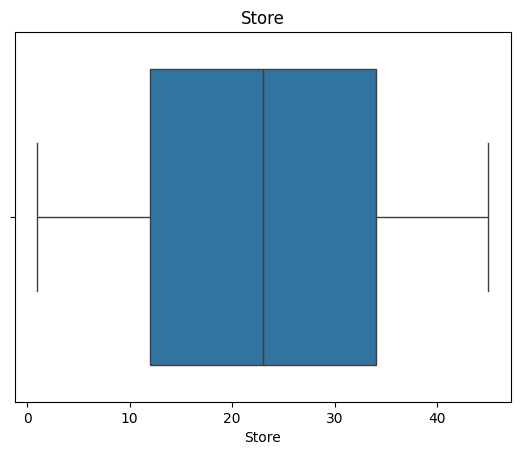

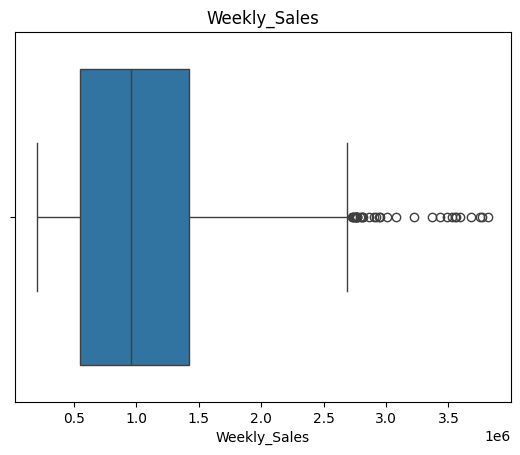

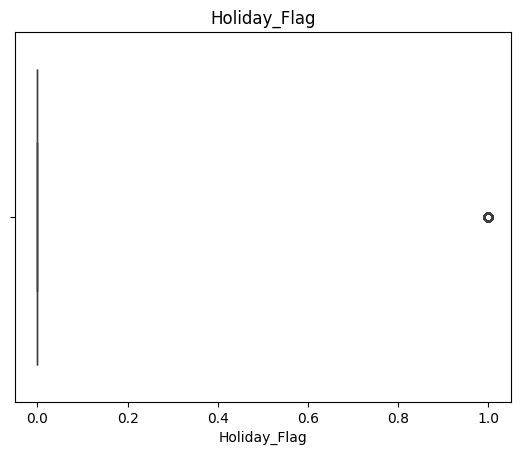

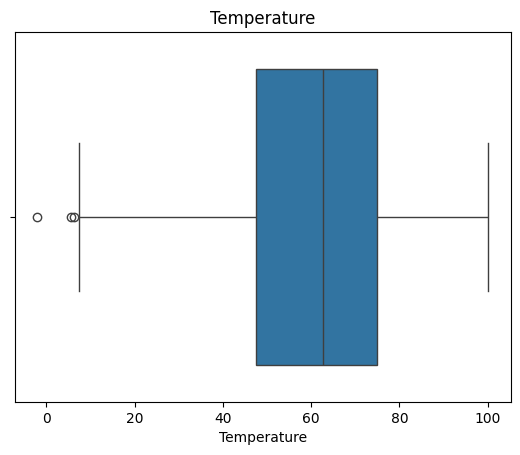

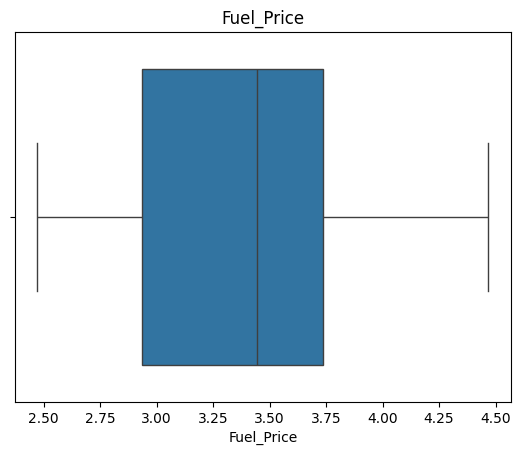

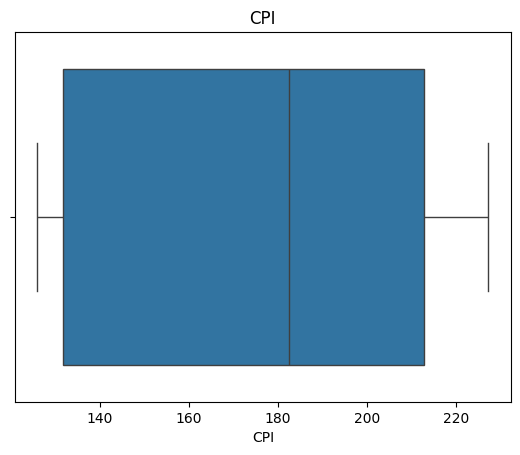

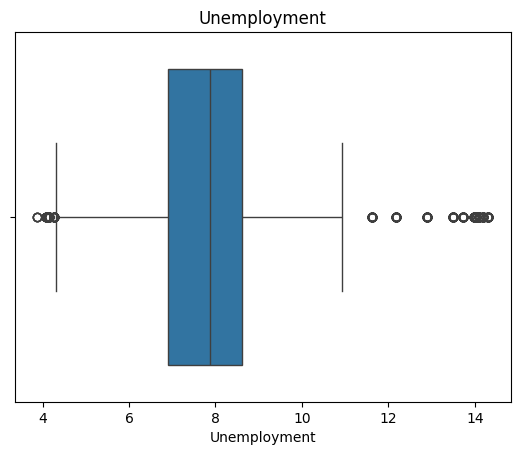

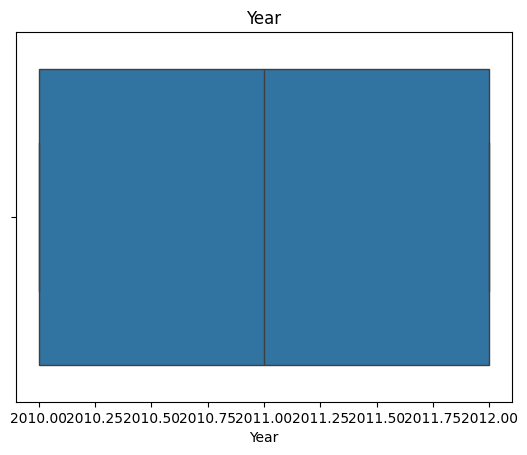

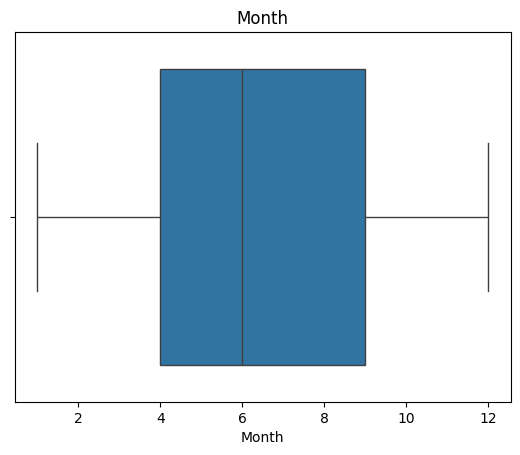

In [ ]:
for i in df.columns:
  if (df[i].dtype!= 'object') & (df[i].dtype != 'datetime64[ns]'):
    sns.boxplot(x= df[i])
    plt.title(i)
  plt.show()

##### Following are the Stores which are most affected by unemploment rate :-
##### 4,9,13,16,17,23,26,34,37,39,40,41,42,44

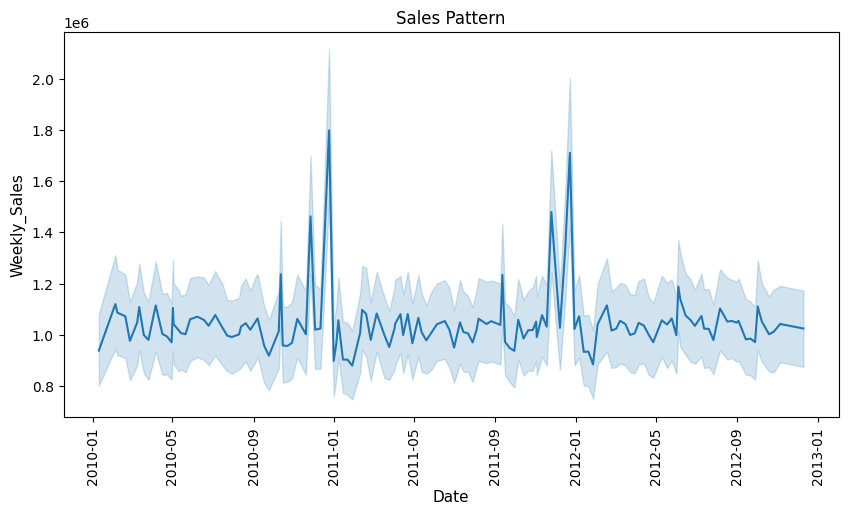

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x= df['Date'], y= df['Weekly_Sales'])
plt.xlabel('Date', fontsize= 11)
plt.ylabel('Weekly_Sales', fontsize= 11)
plt.title('Sales Pattern')
plt.xticks(rotation= 90)
plt.show()

##### Shows a seasonal pattern due to effect of Christmas Eve. More number of people go out for shopping in the month of November and December on occasion of Christmas and New Year

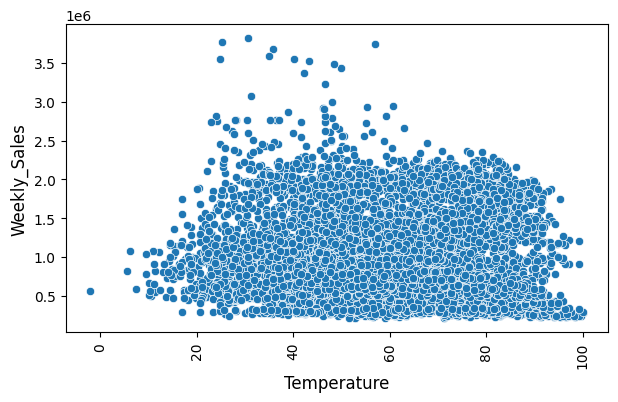

In [ ]:
plt.figure(figsize=(7,4))
sns.scatterplot(x= df['Temperature'], y= df['Weekly_Sales'])
plt.xlabel('Temperature', fontsize= 12)
plt.ylabel('Weekly_Sales', fontsize= 12)
plt.xticks(rotation= 90)
plt.show()

##### Temperature between 40 and 80 Sales is not affected but above 80 and below 40 has some effect

In [ ]:
def CPI_(i):
    CPI= df[df['Store']== i]
    sns.lineplot(x= CPI['CPI'], y= CPI['Weekly_Sales'])
    plt.title('Effect of Unemploment on Weekly Sales')
    plt.xlabel('CPI')
    plt.ylabel('Weekly Sales')
    plt.show()

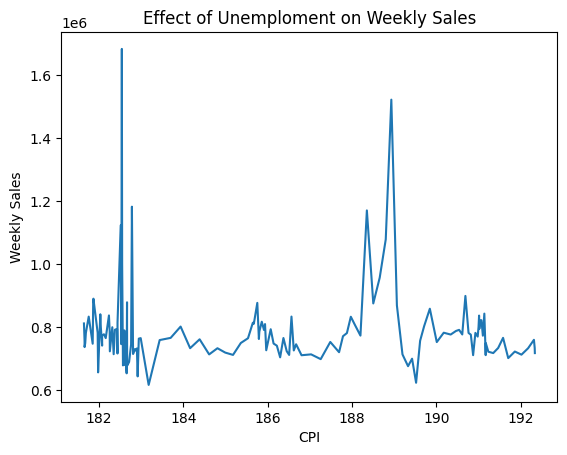

In [ ]:
CPI_(45)

##### Store 1,6,8,9,16,19,20,26,29,31,32,35,37,38,40,43 :-
##### These Stores are constantly moving with ups and downs. But are neither giving an increasing nor decreasing pattern.

##### Store 2,3,4,5,7,13,17,34,39,41,42,44 :-
##### With increase in CPI, Weekly Sales are also increasing. But some stores and showing regular increase and decrease in Weekly Sales in upward direction.

##### Store 10,11,12,14,15,21,27,36,45 :-
##### Showing decreasing pattern with increase in CPI.

##### Store 18 :-
##### Small amount of fall between CPI value 131 and 133 but after that the graph is moving constantly.

##### Store 22, 23 :-
##### Steep jumps are seen and steep falls are also present.

##### Store 25 :-
##### It showed significant increase between CPI value 211 and 212 but went down steeply after it.

##### Store 28 :-
##### Going through tough times after CPI value went above 130.7.

##### Store 30 :-
##### Till 216 it was in decreasing pattern but then showed increase in Sales.

In [ ]:
df_top= pd.DataFrame(df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending= False))
df_top.head(10)

,Weekly_Sales
Store,
20,3.013978e+08
4,2.995440e+08
14,2.889999e+08
13,2.865177e+08
2,2.753824e+08
10,2.716177e+08
27,2.538559e+08
6,2.237561e+08
1,2.224028e+08


##### Below are the Top 10 performing stores
##### Store 20 - 3.013978e+08
##### Store 4 -	2.995440e+08
##### Store 14 -	2.889999e+08
##### Store 13 -	2.865177e+08
##### Store 2 -	2.753824e+08
##### Store 10 - 2.716177e+08
##### Store 27 - 2.538559e+08
##### Store 6 -	2.237561e+08
##### Store 1 -	2.224028e+08
##### Store 39 - 2.074455e+08

In [ ]:
df_worst= pd.DataFrame(df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending= True))
df_worst.head(1)

,Weekly_Sales
Store,
33,37160221.96


##### Worst performing store is Store 33 with weekly sales of 37160221.96
##### Difference between Highest and Lowest is 264235758

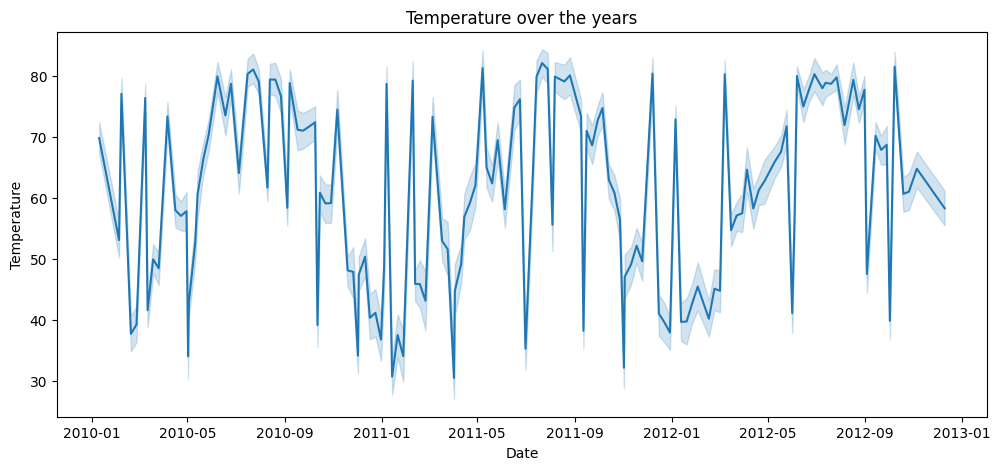

In [9]:
plt.figure(figsize= (12,5))
sns.lineplot(x= df['Date'], y= df['Temperature'])
plt.title('Temperature over the years')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

##### From the above graph Temperature hasn't drastically changed. It is fluctuating as per season.

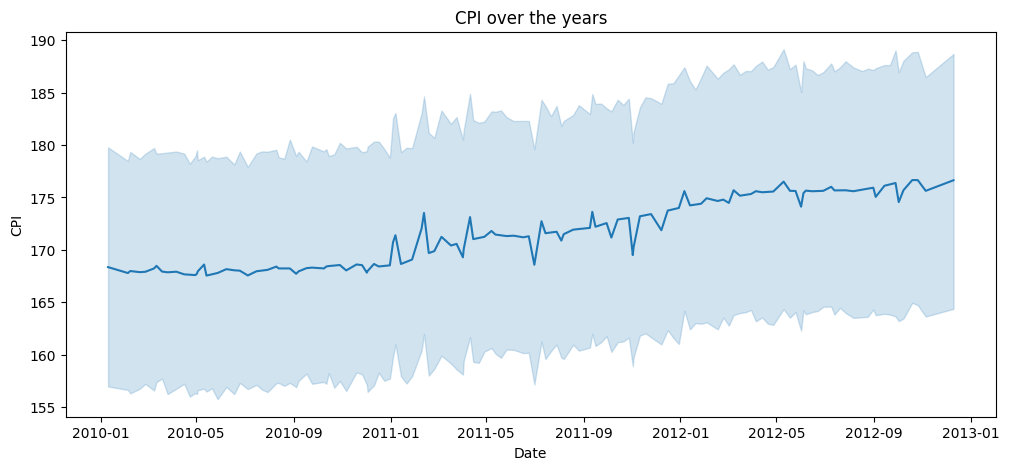

In [10]:
plt.figure(figsize= (12,5))
sns.lineplot(x= df['Date'], y= df['CPI'])
plt.title('CPI over the years')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.show()

##### From the above graph CPI is gradually increasing. It can affect future sales.

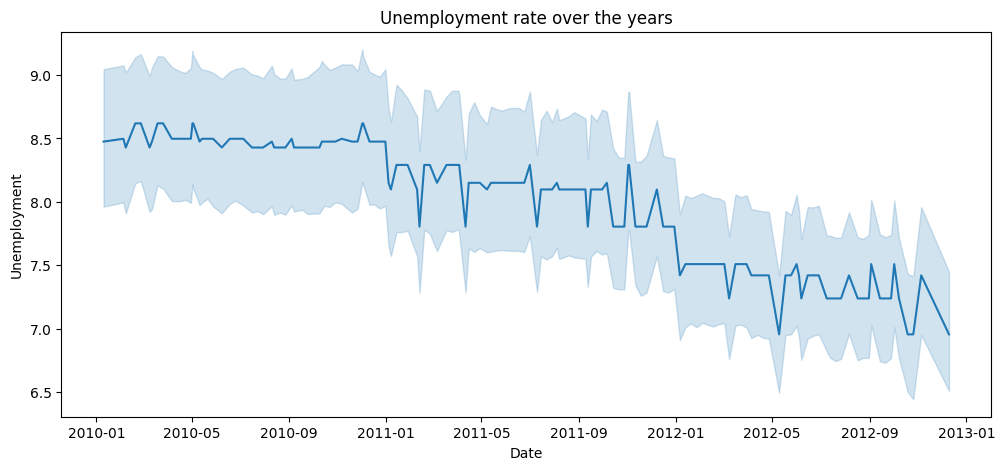

In [11]:
plt.figure(figsize= (12,5))
sns.lineplot(x= df['Date'], y= df['Unemployment'])
plt.title('Unemployment rate over the years')
plt.xlabel('Date')
plt.ylabel('Unemployment')
plt.show()

##### From the above graph we can say that Unemployment rate falling. This can be advantageous for us as people may come to the store and buy more items due to change in their lifestyle.

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5


In [ ]:
df['Week']= df['Date'].dt.week

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

## Model Building

In [ ]:
from prophet import Prophet

In [ ]:
def store_(data, store):
  str_1= data[data['Store']==store]
  str_1.sort_values(by= 'Date', ascending= True, inplace= True)
  str_1= str_1.drop_duplicates(subset= ['Year', 'Month', 'Week'], keep= 'last')
  str_1= str_1[['Date', 'Weekly_Sales']]
  str_1.columns= ['ds', 'y']
  m= Prophet()
  m.fit(str_1)
  future= m.make_future_dataframe(periods= 12, freq= 'W')
  forecast= m.predict(future)
  forecast_mape= forecast['yhat']
  forecast_mape= forecast_mape[:128]
  str_1_mape= str_1['y']
  print('\033[1m', 'Mean Absolute Percentage Error :', '\033[0m', mean_absolute_percentage_error(str_1_mape, forecast_mape))
  return forecast[-12:][['ds', 'yhat']]

### Store 1

In [ ]:
store_(df, 1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/nxw5sdx4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/tkg9rxmp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52141', 'data', 'file=/tmp/tmp7b0vuc6l/nxw5sdx4.json', 'init=/tmp/tmp7b0vuc6l/tkg9rxmp.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modely5jegq4m/prophet_model-20240401111937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.046007013416777834


,ds,yhat
128,2012-12-16,1.992749e+06
129,2012-12-23,2.085533e+06
130,2012-12-30,1.993862e+06
131,2013-01-06,1.745534e+06
132,2013-01-13,1.514605e+06
133,2013-01-20,1.461077e+06
134,2013-01-27,1.588623e+06
135,2013-02-03,1.760820e+06
136,2013-02-10,1.843348e+06
137,2013-02-17,1.816661e+06


### Store 2

In [ ]:
store_(df, 2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/5tsmj6g_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/prewdp65.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1688', 'data', 'file=/tmp/tmp7b0vuc6l/5tsmj6g_.json', 'init=/tmp/tmp7b0vuc6l/prewdp65.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_model3rd3si5k/prophet_model-20240401111938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.05270512513948665


,ds,yhat
128,2012-12-16,2.521438e+06
129,2012-12-23,2.633068e+06
130,2012-12-30,2.420832e+06
131,2013-01-06,1.993808e+06
132,2013-01-13,1.655804e+06
133,2013-01-20,1.620293e+06
134,2013-01-27,1.829520e+06
135,2013-02-03,2.050210e+06
136,2013-02-10,2.115285e+06
137,2013-02-17,2.048697e+06


### Store 3

In [ ]:
store_(df, 3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/fgej95tl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/xhwcdl38.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82945', 'data', 'file=/tmp/tmp7b0vuc6l/fgej95tl.json', 'init=/tmp/tmp7b0vuc6l/xhwcdl38.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_model2n_wlbe6/prophet_model-20240401111938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.05315081706550906


,ds,yhat
128,2012-12-16,526023.033582
129,2012-12-23,546213.069724
130,2012-12-30,525860.635651
131,2013-01-06,466793.586440
132,2013-01-13,409630.136426
133,2013-01-20,397178.970500
134,2013-01-27,434555.007095
135,2013-02-03,486758.992433
136,2013-02-10,513884.044162
137,2013-02-17,505845.689647


### Store 4

In [ ]:
store_(df, 4)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/j46ctfjz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/cpg6geu0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55846', 'data', 'file=/tmp/tmp7b0vuc6l/j46ctfjz.json', 'init=/tmp/tmp7b0vuc6l/cpg6geu0.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelcoqed1us/prophet_model-20240401111940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.053027077804409226


,ds,yhat
128,2012-12-16,2.928518e+06
129,2012-12-23,3.030504e+06
130,2012-12-30,2.820599e+06
131,2013-01-06,2.395368e+06
132,2013-01-13,2.049208e+06
133,2013-01-20,2.003948e+06
134,2013-01-27,2.218337e+06
135,2013-02-03,2.462227e+06
136,2013-02-10,2.552657e+06
137,2013-02-17,2.496348e+06


### Store 5

In [ ]:
store_(df, 5)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/b9rrs2kd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/0pajogby.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80080', 'data', 'file=/tmp/tmp7b0vuc6l/b9rrs2kd.json', 'init=/tmp/tmp7b0vuc6l/0pajogby.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modela7bqa0a8/prophet_model-20240401111940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.051526577567668805


,ds,yhat
128,2012-12-16,395957.418550
129,2012-12-23,423737.022626
130,2012-12-30,418546.238332
131,2013-01-06,370332.241461
132,2013-01-13,315533.478053
133,2013-01-20,300241.431361
134,2013-01-27,332561.433976
135,2013-02-03,376843.451992
136,2013-02-10,393450.132375
137,2013-02-17,377388.381302


### Store 6

In [ ]:
store_(df, 6)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/dua095r8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/3e3eqh3g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69796', 'data', 'file=/tmp/tmp7b0vuc6l/dua095r8.json', 'init=/tmp/tmp7b0vuc6l/3e3eqh3g.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelpg_0yfxu/prophet_model-20240401111941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.05763971170119735


,ds,yhat
128,2012-12-16,2.040605e+06
129,2012-12-23,2.213469e+06
130,2012-12-30,2.073064e+06
131,2013-01-06,1.666653e+06
132,2013-01-13,1.302120e+06
133,2013-01-20,1.244493e+06
134,2013-01-27,1.462728e+06
135,2013-02-03,1.694020e+06
136,2013-02-10,1.733642e+06
137,2013-02-17,1.621773e+06


### Store 7

In [ ]:
store_(df, 7)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/xobb4cgr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/zgsf4kra.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47459', 'data', 'file=/tmp/tmp7b0vuc6l/xobb4cgr.json', 'init=/tmp/tmp7b0vuc6l/zgsf4kra.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_model0gepbsu6/prophet_model-20240401111942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.08561011643297772


,ds,yhat
128,2012-12-16,818858.313944
129,2012-12-23,924055.737079
130,2012-12-30,916985.585955
131,2013-01-06,779434.649713
132,2013-01-13,614783.701478
133,2013-01-20,547753.257674
134,2013-01-27,603494.059532
135,2013-02-03,694288.495684
136,2013-02-10,721011.145952
137,2013-02-17,673377.687667


### Store 8

In [ ]:
store_(df, 8)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/kzvnl96a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/r1rgwdol.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19125', 'data', 'file=/tmp/tmp7b0vuc6l/kzvnl96a.json', 'init=/tmp/tmp7b0vuc6l/r1rgwdol.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelxxc79bwj/prophet_model-20240401111942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.05106496685637719


,ds,yhat
128,2012-12-16,1.207574e+06
129,2012-12-23,1.245499e+06
130,2012-12-30,1.156474e+06
131,2013-01-06,9.806267e+05
132,2013-01-13,8.369203e+05
133,2013-01-20,8.162655e+05
134,2013-01-27,9.065106e+05
135,2013-02-03,1.018674e+06
136,2013-02-10,1.075159e+06
137,2013-02-17,1.066093e+06


### Store 9

In [ ]:
store_(df, 9)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/6imvoy0k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/8wwrujk6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27341', 'data', 'file=/tmp/tmp7b0vuc6l/6imvoy0k.json', 'init=/tmp/tmp7b0vuc6l/8wwrujk6.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_model85uebilb/prophet_model-20240401111943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.05187186679881557


,ds,yhat
128,2012-12-16,743691.594000
129,2012-12-23,780995.983481
130,2012-12-30,734112.923606
131,2013-01-06,619897.424325
132,2013-01-13,521117.878654
133,2013-01-20,508627.845782
134,2013-01-27,576713.621301
135,2013-02-03,656469.542917
136,2013-02-10,686407.015390
137,2013-02-17,663257.679443


### Store 10

In [ ]:
store_(df, 10)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/ynvn95fr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/4xscofh2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21294', 'data', 'file=/tmp/tmp7b0vuc6l/ynvn95fr.json', 'init=/tmp/tmp7b0vuc6l/4xscofh2.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelglxepweg/prophet_model-20240401111943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.06466966661539622


,ds,yhat
128,2012-12-16,2.564847e+06
129,2012-12-23,2.664281e+06
130,2012-12-30,2.382298e+06
131,2013-01-06,1.859576e+06
132,2013-01-13,1.460827e+06
133,2013-01-20,1.435981e+06
134,2013-01-27,1.708023e+06
135,2013-02-03,1.989825e+06
136,2013-02-10,2.076186e+06
137,2013-02-17,1.997804e+06


### Store 11

In [ ]:
store_(df, 11)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/ncn1iblg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/qcc9gf_p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63201', 'data', 'file=/tmp/tmp7b0vuc6l/ncn1iblg.json', 'init=/tmp/tmp7b0vuc6l/qcc9gf_p.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelphb7kjmw/prophet_model-20240401111943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.055600030383304265


,ds,yhat
128,2012-12-16,1.800117e+06
129,2012-12-23,1.866615e+06
130,2012-12-30,1.718180e+06
131,2013-01-06,1.428853e+06
132,2013-01-13,1.194367e+06
133,2013-01-20,1.158118e+06
134,2013-01-27,1.296600e+06
135,2013-02-03,1.466883e+06
136,2013-02-10,1.548336e+06
137,2013-02-17,1.530575e+06


### Store 12

In [ ]:
store_(df, 12)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/ltykjjoz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/6jvtj5n_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57939', 'data', 'file=/tmp/tmp7b0vuc6l/ltykjjoz.json', 'init=/tmp/tmp7b0vuc6l/6jvtj5n_.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_model8v88bddc/prophet_model-20240401111944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.05294593028414335


,ds,yhat
128,2012-12-16,1.309920e+06
129,2012-12-23,1.380536e+06
130,2012-12-30,1.285011e+06
131,2013-01-06,1.052895e+06
132,2013-01-13,8.471322e+05
133,2013-01-20,8.131215e+05
134,2013-01-27,9.488784e+05
135,2013-02-03,1.123393e+06
136,2013-02-10,1.208956e+06
137,2013-02-17,1.184359e+06


### Store 13

In [ ]:
store_(df, 13)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/mn36_mji.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/2w3oqvoa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10483', 'data', 'file=/tmp/tmp7b0vuc6l/mn36_mji.json', 'init=/tmp/tmp7b0vuc6l/2w3oqvoa.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelbn72kz1j/prophet_model-20240401111945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.05332774736323211


,ds,yhat
128,2012-12-16,2.802416e+06
129,2012-12-23,2.918272e+06
130,2012-12-30,2.656144e+06
131,2013-01-06,2.158521e+06
132,2013-01-13,1.775928e+06
133,2013-01-20,1.740637e+06
134,2013-01-27,1.973670e+06
135,2013-02-03,2.206534e+06
136,2013-02-10,2.258038e+06
137,2013-02-17,2.168650e+06


### Store 14

In [ ]:
store_(df, 14)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/no467dx7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/v7i6b9st.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24646', 'data', 'file=/tmp/tmp7b0vuc6l/no467dx7.json', 'init=/tmp/tmp7b0vuc6l/v7i6b9st.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelww8i3q0c/prophet_model-20240401111945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.06533961300938951


,ds,yhat
128,2012-12-16,2.407980e+06
129,2012-12-23,2.520663e+06
130,2012-12-30,2.251300e+06
131,2013-01-06,1.735972e+06
132,2013-01-13,1.336848e+06
133,2013-01-20,1.300795e+06
134,2013-01-27,1.546537e+06
135,2013-02-03,1.788173e+06
136,2013-02-10,1.833272e+06
137,2013-02-17,1.730147e+06


### Store 15

In [ ]:
store_(df, 15)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/kbr1m9gc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/zk9d9ss5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76768', 'data', 'file=/tmp/tmp7b0vuc6l/kbr1m9gc.json', 'init=/tmp/tmp7b0vuc6l/zk9d9ss5.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modely0pun4vg/prophet_model-20240401111946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.07730528679109301


,ds,yhat
128,2012-12-16,869560.161818
129,2012-12-23,933071.274673
130,2012-12-30,835965.849123
131,2013-01-06,614201.019160
132,2013-01-13,425073.150040
133,2013-01-20,394375.809982
134,2013-01-27,499817.723464
135,2013-02-03,612048.916956
136,2013-02-10,635598.690934
137,2013-02-17,589822.200554


### Store 16

In [ ]:
store_(df, 16)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/1w40p2jj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/20g06scn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13342', 'data', 'file=/tmp/tmp7b0vuc6l/1w40p2jj.json', 'init=/tmp/tmp7b0vuc6l/20g06scn.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelohz0_8bd/prophet_model-20240401111946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.07667272032979008


,ds,yhat
128,2012-12-16,738852.060948
129,2012-12-23,818821.027696
130,2012-12-30,775593.485804
131,2013-01-06,630130.828429
132,2013-01-13,492620.242685
133,2013-01-20,456569.320501
134,2013-01-27,514603.794757
135,2013-02-03,581225.485466
136,2013-02-10,588381.519529
137,2013-02-17,546584.267574


### Store 17

In [ ]:
store_(df, 17)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/sy8hk7ds.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/l7zc7yqa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33373', 'data', 'file=/tmp/tmp7b0vuc6l/sy8hk7ds.json', 'init=/tmp/tmp7b0vuc6l/l7zc7yqa.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modellaz5my2m/prophet_model-20240401111947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.0658745900884726


,ds,yhat
128,2012-12-16,1.091821e+06
129,2012-12-23,1.145528e+06
130,2012-12-30,1.110277e+06
131,2013-01-06,9.863461e+05
132,2013-01-13,8.662957e+05
133,2013-01-20,8.439612e+05
134,2013-01-27,9.180223e+05
135,2013-02-03,9.997146e+05
136,2013-02-10,1.013057e+06
137,2013-02-17,9.698798e+05


### Store 18

In [ ]:
store_(df, 18)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/y2l6ybnh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/7szuu366.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50836', 'data', 'file=/tmp/tmp7b0vuc6l/y2l6ybnh.json', 'init=/tmp/tmp7b0vuc6l/7szuu366.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelo3exrx8l/prophet_model-20240401111947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.06945395462601427


,ds,yhat
128,2012-12-16,1.466633e+06
129,2012-12-23,1.521871e+06
130,2012-12-30,1.353961e+06
131,2013-01-06,1.043178e+06
132,2013-01-13,8.051378e+05
133,2013-01-20,7.893144e+05
134,2013-01-27,9.489677e+05
135,2013-02-03,1.111071e+06
136,2013-02-10,1.154843e+06
137,2013-02-17,1.104067e+06


### Store 19

In [ ]:
store_(df, 19)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/4gp74g7h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/wcu66saf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56960', 'data', 'file=/tmp/tmp7b0vuc6l/4gp74g7h.json', 'init=/tmp/tmp7b0vuc6l/wcu66saf.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelvdcnuewy/prophet_model-20240401111948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.052287231168813675


,ds,yhat
128,2012-12-16,1.908027e+06
129,2012-12-23,2.001415e+06
130,2012-12-30,1.806531e+06
131,2013-01-06,1.432979e+06
132,2013-01-13,1.151006e+06
133,2013-01-20,1.132885e+06
134,2013-01-27,1.307749e+06
135,2013-02-03,1.468196e+06
136,2013-02-10,1.488399e+06
137,2013-02-17,1.414568e+06


### Store 20

In [ ]:
store_(df, 20)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/gygn5rcu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/0_9p49bj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35491', 'data', 'file=/tmp/tmp7b0vuc6l/gygn5rcu.json', 'init=/tmp/tmp7b0vuc6l/0_9p49bj.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelw2cca0pe/prophet_model-20240401111948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.05718975562063773


,ds,yhat
128,2012-12-16,2.935918e+06
129,2012-12-23,3.063329e+06
130,2012-12-30,2.816223e+06
131,2013-01-06,2.320726e+06
132,2013-01-13,1.927830e+06
133,2013-01-20,1.883487e+06
134,2013-01-27,2.120169e+06
135,2013-02-03,2.369571e+06
136,2013-02-10,2.442995e+06
137,2013-02-17,2.372694e+06


### Store 21

In [ ]:
store_(df, 21)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/pzff6k05.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/ccp66fx_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99548', 'data', 'file=/tmp/tmp7b0vuc6l/pzff6k05.json', 'init=/tmp/tmp7b0vuc6l/ccp66fx_.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelnrd966z5/prophet_model-20240401111949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.06745642881050057


,ds,yhat
128,2012-12-16,1.020807e+06
129,2012-12-23,1.066647e+06
130,2012-12-30,9.421837e+05
131,2013-01-06,7.128912e+05
132,2013-01-13,5.363177e+05
133,2013-01-20,5.164081e+05
134,2013-01-27,6.207155e+05
135,2013-02-03,7.339295e+05
136,2013-02-10,7.742623e+05
137,2013-02-17,7.491239e+05


### Store 22

In [ ]:
store_(df, 22)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/oxjb_6kq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/ngii300_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78659', 'data', 'file=/tmp/tmp7b0vuc6l/oxjb_6kq.json', 'init=/tmp/tmp7b0vuc6l/ngii300_.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelgvxl4r_x/prophet_model-20240401111949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.06571313949148577


,ds,yhat
128,2012-12-16,1.447997e+06
129,2012-12-23,1.506937e+06
130,2012-12-30,1.342040e+06
131,2013-01-06,1.039244e+06
132,2013-01-13,8.118310e+05
133,2013-01-20,7.981371e+05
134,2013-01-27,9.413704e+05
135,2013-02-03,1.071109e+06
136,2013-02-10,1.083091e+06
137,2013-02-17,1.019880e+06


### Store 23

In [ ]:
store_(df, 23)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/u3m2h8n6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/6li_9zbs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73753', 'data', 'file=/tmp/tmp7b0vuc6l/u3m2h8n6.json', 'init=/tmp/tmp7b0vuc6l/6li_9zbs.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelxr1dmelk/prophet_model-20240401111949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.08233019349534859


,ds,yhat
128,2012-12-16,2.128553e+06
129,2012-12-23,2.189578e+06
130,2012-12-30,1.896382e+06
131,2013-01-06,1.414278e+06
132,2013-01-13,1.078271e+06
133,2013-01-20,1.079723e+06
134,2013-01-27,1.310994e+06
135,2013-02-03,1.512922e+06
136,2013-02-10,1.539801e+06
137,2013-02-17,1.457255e+06


### Store 24

In [ ]:
store_(df, 24)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/xd34v3z4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/9p0lqsk2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56053', 'data', 'file=/tmp/tmp7b0vuc6l/xd34v3z4.json', 'init=/tmp/tmp7b0vuc6l/9p0lqsk2.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_model0_99c0re/prophet_model-20240401111950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.05518739609263758


,ds,yhat
128,2012-12-16,1.800098e+06
129,2012-12-23,1.917114e+06
130,2012-12-30,1.794678e+06
131,2013-01-06,1.483688e+06
132,2013-01-13,1.207417e+06
133,2013-01-20,1.146019e+06
134,2013-01-27,1.276465e+06
135,2013-02-03,1.428998e+06
136,2013-02-10,1.475217e+06
137,2013-02-17,1.433230e+06


### Store 25

In [ ]:
store_(df, 25)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/us8ge1n4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/zo1ngwer.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43613', 'data', 'file=/tmp/tmp7b0vuc6l/us8ge1n4.json', 'init=/tmp/tmp7b0vuc6l/zo1ngwer.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelvqekactm/prophet_model-20240401111950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.07060431409569895


,ds,yhat
128,2012-12-16,9.575845e+05
129,2012-12-23,1.006074e+06
130,2012-12-30,9.016183e+05
131,2013-01-06,6.956549e+05
132,2013-01-13,5.386260e+05
133,2013-01-20,5.324845e+05
134,2013-01-27,6.368390e+05
135,2013-02-03,7.257241e+05
136,2013-02-10,7.227868e+05
137,2013-02-17,6.641119e+05


### Store 26

In [ ]:
store_(df, 26)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/ulsavulc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/eth09lit.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72075', 'data', 'file=/tmp/tmp7b0vuc6l/ulsavulc.json', 'init=/tmp/tmp7b0vuc6l/eth09lit.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelrn44f7yz/prophet_model-20240401111951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.04207146105102034


,ds,yhat
128,2012-12-16,1.319073e+06
129,2012-12-23,1.383172e+06
130,2012-12-30,1.299529e+06
131,2013-01-06,1.100088e+06
132,2013-01-13,9.254641e+05
133,2013-01-20,8.914449e+05
134,2013-01-27,9.842634e+05
135,2013-02-03,1.091228e+06
136,2013-02-10,1.122343e+06
137,2013-02-17,1.086880e+06


### Store 27

In [ ]:
store_(df, 27)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/tufrbfn7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/bomf2tdd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96051', 'data', 'file=/tmp/tmp7b0vuc6l/tufrbfn7.json', 'init=/tmp/tmp7b0vuc6l/bomf2tdd.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelp0xzaiag/prophet_model-20240401111951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.06340249639245026


,ds,yhat
128,2012-12-16,2.210989e+06
129,2012-12-23,2.291097e+06
130,2012-12-30,2.112055e+06
131,2013-01-06,1.731393e+06
132,2013-01-13,1.404077e+06
133,2013-01-20,1.334593e+06
134,2013-01-27,1.488141e+06
135,2013-02-03,1.659766e+06
136,2013-02-10,1.702302e+06
137,2013-02-17,1.649628e+06


### Store 28

In [ ]:
store_(df, 28)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/fvs0zv_8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/mf_3cpcl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2735', 'data', 'file=/tmp/tmp7b0vuc6l/fvs0zv_8.json', 'init=/tmp/tmp7b0vuc6l/mf_3cpcl.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelnudupbij/prophet_model-20240401111952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.06522905112200708


,ds,yhat
128,2012-12-16,1.662675e+06
129,2012-12-23,1.729085e+06
130,2012-12-30,1.675877e+06
131,2013-01-06,1.492821e+06
132,2013-01-13,1.304200e+06
133,2013-01-20,1.252664e+06
134,2013-01-27,1.366566e+06
135,2013-02-03,1.545135e+06
136,2013-02-10,1.663034e+06
137,2013-02-17,1.675957e+06


### Store 29

In [ ]:
store_(df, 29)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/adzi2a_7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/suhmtuhp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23407', 'data', 'file=/tmp/tmp7b0vuc6l/adzi2a_7.json', 'init=/tmp/tmp7b0vuc6l/suhmtuhp.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_model0m_h39no/prophet_model-20240401111952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.07828532840034935


,ds,yhat
128,2012-12-16,767979.704533
129,2012-12-23,819352.351497
130,2012-12-30,742712.377385
131,2013-01-06,567365.244256
132,2013-01-13,416254.584270
133,2013-01-20,387588.213113
134,2013-01-27,466000.668452
135,2013-02-03,553690.991873
136,2013-02-10,576570.325549
137,2013-02-17,545822.040834


### Store 30

In [ ]:
store_(df, 30)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/lq0rezyp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/arw9wtun.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18675', 'data', 'file=/tmp/tmp7b0vuc6l/lq0rezyp.json', 'init=/tmp/tmp7b0vuc6l/arw9wtun.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modeldfg7v_nj/prophet_model-20240401111953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.02633250423268981


,ds,yhat
128,2012-12-16,456945.065331
129,2012-12-23,451899.709393
130,2012-12-30,445450.219552
131,2013-01-06,442980.165115
132,2013-01-13,445512.792013
133,2013-01-20,448615.229037
134,2013-01-27,447628.798895
135,2013-02-03,443168.789067
136,2013-02-10,440148.193131
137,2013-02-17,441375.715516


### Store 31

In [ ]:
store_(df, 31)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/ruhcmodw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/vghruua2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76750', 'data', 'file=/tmp/tmp7b0vuc6l/ruhcmodw.json', 'init=/tmp/tmp7b0vuc6l/vghruua2.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_model2gzelr11/prophet_model-20240401111954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.043981049695131


,ds,yhat
128,2012-12-16,1.689218e+06
129,2012-12-23,1.713936e+06
130,2012-12-30,1.629009e+06
131,2013-01-06,1.463624e+06
132,2013-01-13,1.325966e+06
133,2013-01-20,1.302478e+06
134,2013-01-27,1.382223e+06
135,2013-02-03,1.480445e+06
136,2013-02-10,1.525456e+06
137,2013-02-17,1.513340e+06


### Store 32

In [ ]:
store_(df, 32)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/omajsn24.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/juwgempc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44220', 'data', 'file=/tmp/tmp7b0vuc6l/omajsn24.json', 'init=/tmp/tmp7b0vuc6l/juwgempc.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelkagfsr1r/prophet_model-20240401111955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.04941630677564391


,ds,yhat
128,2012-12-16,1.563979e+06
129,2012-12-23,1.594609e+06
130,2012-12-30,1.455016e+06
131,2013-01-06,1.218970e+06
132,2013-01-13,1.050644e+06
133,2013-01-20,1.049640e+06
134,2013-01-27,1.165573e+06
135,2013-02-03,1.265854e+06
136,2013-02-10,1.272137e+06
137,2013-02-17,1.217642e+06


### Store 33

In [ ]:
store_(df, 33)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/u0fb_kez.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/x8rpcmlf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1610', 'data', 'file=/tmp/tmp7b0vuc6l/u0fb_kez.json', 'init=/tmp/tmp7b0vuc6l/x8rpcmlf.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelu4rx42d4/prophet_model-20240401111956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.05740040949434953


,ds,yhat
128,2012-12-16,255494.647106
129,2012-12-23,244532.766644
130,2012-12-30,240835.573635
131,2013-01-06,245636.292949
132,2013-01-13,252764.251385
133,2013-01-20,254631.039657
134,2013-01-27,249970.399497
135,2013-02-03,245221.603094
136,2013-02-10,247581.063738
137,2013-02-17,256781.107811


### Store 34

In [ ]:
store_(df, 34)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/3_hho942.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/9aatk9i6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70630', 'data', 'file=/tmp/tmp7b0vuc6l/3_hho942.json', 'init=/tmp/tmp7b0vuc6l/9aatk9i6.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modeln1uwzrxh/prophet_model-20240401111956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.048322262516638785


,ds,yhat
128,2012-12-16,1.236015e+06
129,2012-12-23,1.289361e+06
130,2012-12-30,1.212505e+06
131,2013-01-06,1.034248e+06
132,2013-01-13,8.789473e+05
133,2013-01-20,8.510289e+05
134,2013-01-27,9.404764e+05
135,2013-02-03,1.045690e+06
136,2013-02-10,1.080625e+06
137,2013-02-17,1.047746e+06


### Store 35

In [ ]:
store_(df, 35)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/4a7bdxvj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/74shxw6b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55071', 'data', 'file=/tmp/tmp7b0vuc6l/4a7bdxvj.json', 'init=/tmp/tmp7b0vuc6l/74shxw6b.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelowr_ie1l/prophet_model-20240401111957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.09835271920683315


,ds,yhat
128,2012-12-16,1.084515e+06
129,2012-12-23,1.111539e+06
130,2012-12-30,9.895177e+05
131,2013-01-06,7.325804e+05
132,2013-01-13,5.023867e+05
133,2013-01-20,4.553808e+05
134,2013-01-27,5.919743e+05
135,2013-02-03,7.678556e+05
136,2013-02-10,8.439198e+05
137,2013-02-17,8.066139e+05


### Store 36

In [ ]:
store_(df, 36)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/12korp0y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/4nxkjc2f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71426', 'data', 'file=/tmp/tmp7b0vuc6l/12korp0y.json', 'init=/tmp/tmp7b0vuc6l/4nxkjc2f.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_model_l3v80ud/prophet_model-20240401111958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.04618699317794775


,ds,yhat
128,2012-12-16,270736.031460
129,2012-12-23,245019.949472
130,2012-12-30,226755.349274
131,2013-01-06,228045.861396
132,2013-01-13,241096.242492
133,2013-01-20,247466.948808
134,2013-01-27,238822.822801
135,2013-02-03,225343.221092
136,2013-02-10,222582.318940
137,2013-02-17,232810.768966


### Store 37

In [ ]:
store_(df, 37)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/tna1u9nd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/00oxxrne.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12621', 'data', 'file=/tmp/tmp7b0vuc6l/tna1u9nd.json', 'init=/tmp/tmp7b0vuc6l/00oxxrne.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_model0p0ko1lz/prophet_model-20240401111958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.024046410412334355


,ds,yhat
128,2012-12-16,548145.696027
129,2012-12-23,543364.213445
130,2012-12-30,538740.171026
131,2013-01-06,538863.544219
132,2013-01-13,542114.285991
133,2013-01-20,543415.861830
134,2013-01-27,540956.763282
135,2013-02-03,538513.990907
136,2013-02-10,540343.656374
137,2013-02-17,544872.162822


### Store 38

In [ ]:
store_(df, 38)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/p1w6nra_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/xt2cy9va.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63654', 'data', 'file=/tmp/tmp7b0vuc6l/p1w6nra_.json', 'init=/tmp/tmp7b0vuc6l/xt2cy9va.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelxg4_ijld/prophet_model-20240401111959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.03552630401168576


,ds,yhat
128,2012-12-16,465429.968371
129,2012-12-23,473728.871260
130,2012-12-30,485331.322798
131,2013-01-06,492216.972229
132,2013-01-13,493961.675232
133,2013-01-20,496455.683056
134,2013-01-27,503157.105259
135,2013-02-03,510365.894360
136,2013-02-10,512190.368326
137,2013-02-17,508318.410153


### Store 39

In [ ]:
store_(df, 39)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/ikw7eyez.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/7f13iqou.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75482', 'data', 'file=/tmp/tmp7b0vuc6l/ikw7eyez.json', 'init=/tmp/tmp7b0vuc6l/7f13iqou.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_model4iyhenuv/prophet_model-20240401111959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.062388689232103486


,ds,yhat
128,2012-12-16,2.033449e+06
129,2012-12-23,2.146025e+06
130,2012-12-30,2.025069e+06
131,2013-01-06,1.707600e+06
132,2013-01-13,1.422794e+06
133,2013-01-20,1.368141e+06
134,2013-01-27,1.521563e+06
135,2013-02-03,1.688023e+06
136,2013-02-10,1.713967e+06
137,2013-02-17,1.626879e+06


### Store 40

In [ ]:
store_(df, 40)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/l0p64k83.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/2hvpytcw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79580', 'data', 'file=/tmp/tmp7b0vuc6l/l0p64k83.json', 'init=/tmp/tmp7b0vuc6l/2hvpytcw.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelst7tnvap/prophet_model-20240401111959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.049474491884820324


,ds,yhat
128,2012-12-16,1.333136e+06
129,2012-12-23,1.419400e+06
130,2012-12-30,1.324362e+06
131,2013-01-06,1.094229e+06
132,2013-01-13,8.969888e+05
133,2013-01-20,8.634290e+05
134,2013-01-27,9.725699e+05
135,2013-02-03,1.095322e+06
136,2013-02-10,1.133996e+06
137,2013-02-17,1.101702e+06


### Store 41

In [ ]:
store_(df, 41)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/di75fgtp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/x6x0q_t0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3101', 'data', 'file=/tmp/tmp7b0vuc6l/di75fgtp.json', 'init=/tmp/tmp7b0vuc6l/x6x0q_t0.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modeldb5dvfw2/prophet_model-20240401112000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:20:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:20:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.06130641816199909


,ds,yhat
128,2012-12-16,1.840101e+06
129,2012-12-23,1.922476e+06
130,2012-12-30,1.786969e+06
131,2013-01-06,1.493981e+06
132,2013-01-13,1.249489e+06
133,2013-01-20,1.208787e+06
134,2013-01-27,1.338605e+06
135,2013-02-03,1.476230e+06
136,2013-02-10,1.504030e+06
137,2013-02-17,1.444859e+06


### Store 42

In [ ]:
store_(df, 42)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/r63ke00b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/38_u17gu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36289', 'data', 'file=/tmp/tmp7b0vuc6l/r63ke00b.json', 'init=/tmp/tmp7b0vuc6l/38_u17gu.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_model97lr7bpr/prophet_model-20240401112000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:20:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:20:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.05619936958156713


,ds,yhat
128,2012-12-16,602573.505306
129,2012-12-23,576452.832137
130,2012-12-30,570180.942015
131,2013-01-06,588663.632374
132,2013-01-13,614939.594655
133,2013-01-20,625619.317260
134,2013-01-27,613240.191207
135,2013-02-03,592588.392886
136,2013-02-10,584785.922058
137,2013-02-17,596233.252206


### Store 43

In [ ]:
store_(df, 43)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/xhgudgl8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/ixo82wbw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80322', 'data', 'file=/tmp/tmp7b0vuc6l/xhgudgl8.json', 'init=/tmp/tmp7b0vuc6l/ixo82wbw.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelln_x52rk/prophet_model-20240401112000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:20:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:20:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.043297554615836245


,ds,yhat
128,2012-12-16,600349.891851
129,2012-12-23,590749.798441
130,2012-12-30,584966.193609
131,2013-01-06,584584.390510
132,2013-01-13,589487.629141
133,2013-01-20,597819.230763
134,2013-01-27,606112.289938
135,2013-02-03,610718.295649
136,2013-02-10,610069.010702
137,2013-02-17,605609.955338


### Store 44

In [ ]:
store_(df, 44)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/s7cjz9dc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/rsimcsxa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17129', 'data', 'file=/tmp/tmp7b0vuc6l/s7cjz9dc.json', 'init=/tmp/tmp7b0vuc6l/rsimcsxa.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_model7_j1g0va/prophet_model-20240401112000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:20:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:20:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.0310908371876064


,ds,yhat
128,2012-12-16,367180.297318
129,2012-12-23,372706.191617
130,2012-12-30,369503.397084
131,2013-01-06,362590.065590
132,2013-01-13,358592.557550
133,2013-01-20,359180.664995
134,2013-01-27,361050.970239
135,2013-02-03,361138.013641
136,2013-02-10,360229.773271
137,2013-02-17,361116.635747


### Store 45

In [ ]:
store_(df, 45)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/42fq1i3_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b0vuc6l/ubacuzd2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10490', 'data', 'file=/tmp/tmp7b0vuc6l/42fq1i3_.json', 'init=/tmp/tmp7b0vuc6l/ubacuzd2.json', 'output', 'file=/tmp/tmp7b0vuc6l/prophet_modelvdcdlx25/prophet_model-20240401112001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:20:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:20:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Mean Absolute Percentage Error :  0.0651930788401463


,ds,yhat
128,2012-12-16,1.133075e+06
129,2012-12-23,1.222288e+06
130,2012-12-30,1.112066e+06
131,2013-01-06,8.558129e+05
132,2013-01-13,6.377887e+05
133,2013-01-20,5.992923e+05
134,2013-01-27,7.157481e+05
135,2013-02-03,8.455810e+05
136,2013-02-10,8.818167e+05
137,2013-02-17,8.387041e+05
